In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from astropy.table import Table

In [4]:
df = Table.read("../data/Sculptor.GAIASOURCE.RUWE.VELS.PROB.2-comp-ell.fits")

In [1]:
def Lpmsat( mux, muy, x, y, sx, sy, rho ):
    """
    mux, muy = MCMC estimate of proper motion (JAX - you can use the estimated proper motion here instead!)
    x, y = proper motions of stars
    sx, sy = proper motion errors of stars
    rho = correlation of star's proper motion
    
    THIS function is already normed, because of the 1/(2pi blalala) at the front of the equation
        => an integral from -3sig to 3sig in x and y should yield 1
    """
    
    normalization = ( 1. / ( 2. * np.pi * sx * sy * np.sqrt( 1. - rho ** 2. ) ) )
    delta_x = ( x - mux )
    delta_y = ( y - muy )
    
    likelihood = normalization * np.exp( -( 1. / ( 2. * ( 1. - rho ** 2. ) ) ) * ( ( delta_x ** 2. ) / ( sx ** 2. ) \
                + ( delta_y ** 2. ) / ( sy ** 2. ) - ( ( 2. * rho * delta_x * delta_y ) / ( sx * sy ) ) ) )
    
    return likelihood

In [9]:
pmra = 0.099
pmdec = -0.160

In [10]:
Lpm_me = Lpmsat(df["pmra"], df["pmdec"], pmra, pmdec, df["pmra_error"], df["pmdec_error"], df["pmra_pmdec_corr"]) 

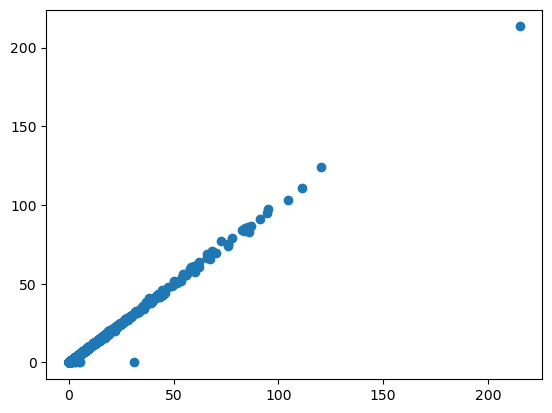

In [13]:
plt.scatter(Lpm_me, df["L_PM_SAT"])

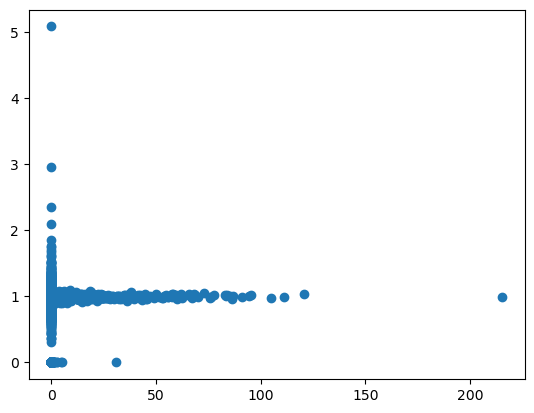

In [15]:
plt.scatter(Lpm_me, df["L_PM_SAT"] / Lpm_me)